# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

## Initial Data Exploration:

In [ ]:
!pip install -U fsds_100719
from fsds_100719.imports import *

In [1]:
#Your code here


import pandas as pd
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactiv

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [3]:
df.describe()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,16236.000000,16253.000000,16238.000000,16249.000000,16253.000000,16221.000000,10657.000000,10655.000000,10644.000000,10656.000000,10650.000000,10640.000000,5.178000e+03,4499.000000,4.343000e+03
mean,33.596945,25.814680,13.760184,21.133270,4.467212,1.449728,35.680304,27.455279,10.007657,13.639968,9.249953,2.254041,4.129494e+07,0.703416,6.636071e+06
std,23.781350,24.558786,17.845975,23.784604,10.186693,8.437395,19.364950,17.450835,10.458430,9.947624,12.429025,10.302431,1.965335e+09,0.486681,4.293996e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000030,-7.351631e+01
25%,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,25.000000,15.000000,5.000000,10.000000,0.000000,0.000000,5.000000e+04,0.058444,2.036942e+04
50%,30.000000,20.000000,10.000000,15.000000,0.000000,0.000000,30.000000,30.000000,10.000000,10.000000,5.000000,0.000000,9.000000e+04,1.000000,5.381217e+04
75%,50.000000,35.000000,20.000000,40.000000,5.000000,0.000000,50.000000,40.000000,10.000000,15.000000,15.000000,0.000000,1.900000e+05,1.000000,9.566608e+04
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,1.000000e+11,2.652053,2.829740e+10


### Exploring data to determine where Masters and Bachelors Degree might be found, located appropriate field called "FormalEducation"

In [4]:
list(df.columns)

['GenderSelect',
 'Country',
 'Age',
 'EmploymentStatus',
 'StudentStatus',
 'LearningDataScience',
 'CodeWriter',
 'CareerSwitcher',
 'CurrentJobTitleSelect',
 'TitleFit',
 'CurrentEmployerType',
 'MLToolNextYearSelect',
 'MLMethodNextYearSelect',
 'LanguageRecommendationSelect',
 'PublicDatasetsSelect',
 'LearningPlatformSelect',
 'LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'Lear

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [6]:
import flatiron_stats as fs

### H1: Adjusted salaries of a Formal Education equivalent to a Bachelor's Degree is significantly not equal to the Adjusted salary of a Formal Education 
### H0: mean salaries w/ Master's = mean salaries w/ Bachelor's

### Collecting information regarding size and mean of appropriate data to begin testing analysis

In [ ]:
#masters = df.groupby('FormalEducation').get_group("Master's degree")[['AdjustedCompensation','AdjustedCompensation']]

In [10]:
masters = df.groupby('FormalEducation').get_group("Master's degree")['AdjustedCompensation'].dropna().rename('masters')
masters.head()

3     250000.000
14     36634.400
27     53352.000
31     35419.104
37     80000.000
Name: masters, dtype: float64

#### Masters Info:

n_samplemast: 1990

Mean Adjusted Compensation: $69139.90

In [ ]:
masters = df[df['FormalEducation']=="Master's degree"]
len(masters)

In [ ]:
len(masters)

In [ ]:
samplemast = masters['AdjustedCompensation'].dropna()
n_samplemast = len(samplemast)
n_samplemast

In [ ]:
mu_samplemast = round(samplemast.mean(), 2)
mu_samplemast

In [ ]:
median_samplemast = round(samplemast.median(),2)
median_samplemast

#### Bachelor's Info: 

n_samplebach: 1107


mu_samplebach: $64887.10


In [62]:
bachelors = df.groupby('FormalEducation').get_group("Bachelor's degree")['AdjustedCompensation'].dropna().rename('bachelors')
bachelors.head()

8     64184.800
9     20882.400
11     1483.900
21    20000.000
25    10858.848
Name: bachelors, dtype: float64

In [57]:
bach = df[df['FormalEducation']=="Bachelor's degree"]
len(bach)

4811

In [ ]:
avsalbach = bach['AdjustedCompensation'].mean()
round(avsalbach,2)

In [ ]:
samplebach = bach['AdjustedCompensation'].dropna()
n_samplebach = len(samplebach)
n_samplebach

In [ ]:
mu_samplebach = round(samplebach.mean(),2)
mu_samplebach

In [ ]:
median_samplebach = round(samplebach.median(),2)
median_samplebach

#### Sample Mean Difference between Bachelor's and Master's 

4252.8

Can see that there are outliers that could be removed for a more normalized distribution.

### Analysis: 

In [ ]:
print(f'Comparison of Adjusted Compensation for Formal Education of Bachelors and Masters Degrees')
print(f"Median Values: Bachelors: ${median_samplebach} , Masters: ${median_samplemast}")
print(f"Mean Values: Bachelors: ${mu_samplebach}  , Masters: ${ mu_samplemast }")
print(f"Sample sizes: Bachelors: {n_samplebach} , Masters: {n_samplemast}")
print("Welch's t-test p-value:", fs.p_value_welch_ttest(samplebach, samplemast))

In [ ]:
delta_bach_masters = round(np.abs(mu_samplebach - mu_samplemast),2)
print(f'The absolute delta in mean values from the two samples is: {delta_bach_masters}')

In [19]:
ans = masters.describe()
print(ans)

count    1.990000e+03
mean     6.913990e+04
std      1.355272e+05
min      0.000000e+00
25%      2.186800e+04
50%      5.381217e+04
75%      9.200000e+04
max      4.498900e+06
Name: masters, dtype: float64


In [21]:
iqr = ans['75%'] - ans['25%']

In [22]:
lower = ans['25%']-(iqr*1.5)
upper = ans['75%']+(iqr*1.5)

In [39]:
bigger_than_thresh = ~(masters>upper)
smaller_than_thresh = ~(masters<lower)


In [53]:
mst = masters[bigger_than_thresh | smaller_than_thresh].rename(masters)

In [65]:
ansb = bachelors.describe()
ansb

count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: bachelors, dtype: float64

In [66]:
lowerb = ans['25%']-(iqr*1.5)
upperb = ans['75%']+(iqr*1.5)

In [68]:
btt = ~(bachelors>upperb)
stt = ~(bachelors<lowerb)

In [70]:
bst = bachelors[btt | stt]
bst

8         64184.800
9         20882.400
11         1483.900
21        20000.000
25        10858.848
            ...    
26031     39050.000
26072     31878.000
26101      3336.000
26185     50000.000
26195    100449.384
Name: bachelors, Length: 1107, dtype: float64

In [72]:
bst.describe()

count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: bachelors, dtype: float64

In [73]:
fs.p_value_welch_ttest(bst, s2)

NameError: name 's2' is not defined

mast

In [45]:
masters_sans_thresh.describe().round(2)

count       1990.00
mean       69139.90
std       135527.21
min            0.00
25%        21868.00
50%        53812.17
75%        92000.00
max      4498900.00
Name: masters, dtype: float64

In [74]:
fs.p_value_welch_ttest(masters_sans_thresh, bst)

0.33077639451272445

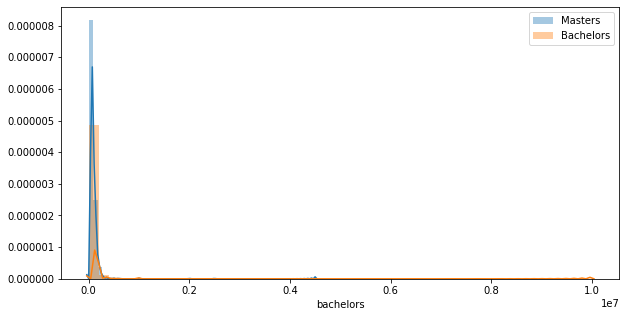

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, ax = plot.subplots(figsize=(10,5))
sns.distplot(masters_sans_thresh, label='Masters', ax=ax)
sns.distplot(bst, label='Bachelors', ax=ax)
ax.legend()

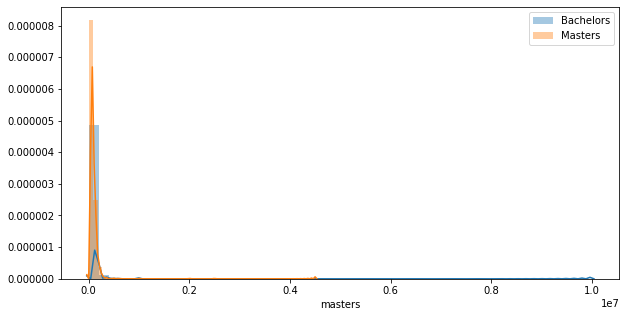

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, ax = plot.subplots(figsize=(10,5))
sns.distplot(bachelors, label='Bachelors', ax= ax)
sns.distplot(masters, label='Masters', ax = ax)
ax.legend()




### Inspect quantiles:

In [46]:
for q in np.linspace(.8, 1, num=21):
    s1q =  round(samplebach.quantile(q=q), 2)
    s2q =  round(samplemast.quantile(q=q), 2)
    print('{}th percentile:\tBachelors: {}\tMasters: {}'.format(round(q,2), s1q, s2q))

NameError: name 'samplebach' is not defined

In [44]:
#Subset the appropriate data into 2 groups
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
f1c1 = "Master's degree"
f1c2 = "Bachelor's degree"
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
s1 = subset[subset[f1]==f1c1][f2]
s2 = subset[subset[f1]==f1c2][f2]

In [46]:
print('Repeated Test with Outliers Removed:')
print('S1: {}\tS2: {}'.format(f1c1, f1c2))
outlier_threshold = 500000
s1 = subset[(subset[f1]==f1c1) & (subset[f2]<=outlier_threshold)][f2]
s2 = subset[(subset[f1]==f1c2) & (subset[f2]<=outlier_threshold)][f2]
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(s1, s2))

Repeated Test with Outliers Removed:
S1: Master's degree	S2: Bachelor's degree
Median Values: 	s1: 53539.72 	s2: 38292.15
Mean Values: 	s1: 63976.63 	s2: 53744.35
Sample sizes: 	s1: 1985 	s2: 1103
Welch's t-test p-value with outliers removed: 4.4874583271514723e-07


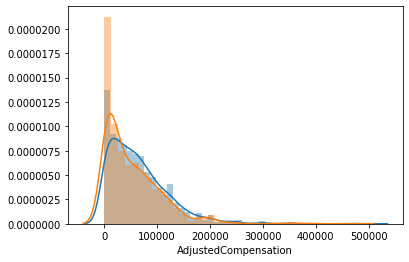

In [47]:
sns.distplot(s1)
sns.distplot(s2)

In [73]:
revbach1 = samplebach[::1].dropna()
len(revbach1)


1107

In [142]:
print(f'Comparison of Adjusted Compensation for Formal Education of Bachelors and Masters Degrees')
print(f"Median Values: Bachelors: ${rsamplebach.median()} , Masters: ${rsamlemast.median()}")
print(f"Mean Values: Bachelors: ${mu_samplebach}  , Masters: ${ mu_samplemast }")
print(f"Sample sizes: Bachelors: {n_samplebach} , Masters: {n_samplemast}")
print("Welch's t-test p-value:", fs.p_value_welch_ttest(samplebach, samplemast))

Comparison of Adjusted Compensation for Formal Education of Bachelors and Masters Degrees


AttributeError: 'numpy.bool_' object has no attribute 'median'

In [37]:
#Your code here
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """
    num = a.mean()-b.mean()
    denom = np.sqrt((a.var(ddof=1)/len(a))+(b.var(ddof=1)/len(b)))

    ##while it doesn't explicitly say so, use the absolute value
    return np.abs(num/denom)



In [38]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = len(a)
    n2 = len(b)

    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)

    return numerator/denominator


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [48]:
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
s1 = subset[subset[f1]=="Doctoral degree"][f2]
s2 = subset[subset[f1]=="Bachelor's degree"][f2]
print("Median Values: \ns1:{} \ns2:{}".format(round(s1.median(),2), round(s2.median(),2)))
print('Sample sizes: \ns1: {} \ns2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(s1, s2))

print('\n\nRepeated Test with Ouliers Removed:')
outlier_threshold = 500000
s1 = subset[(subset[f1]=="Doctoral degree") & (subset[f2]<=outlier_threshold)][f2]
s2 = subset[(subset[f1]=="Bachelor's degree") & (subset[f2]<=outlier_threshold)][f2]
print('Sample sizes: \ns1: {} \ns2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(s1, s2))

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.15682381994720251


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


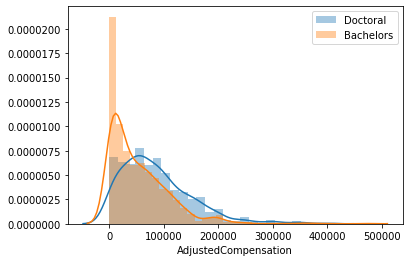

In [51]:
sns.distplot(s1, label = 'Doctoral')
sns.distplot(s2, label = 'Bachelors')
plot.legend()
plot.show()


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [9]:
df.head()


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
mast = "Master's degree"
bach = "Bachelor's degree"
doc = "Doctoral degree"
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
mast = subset[subset[f1]==mast][f2]
bach = subset[subset[f1]==bach][f2]
doc = subset[subset[f1]==doc][f2]

TypeError: dict expected at most 1 arguments, got 3

can we build our model using this df instead??

In [15]:

df1 = df[['FormalEducation','AdjustedCompensation']].copy()
bach = df[df['FormalEducation']=="Bachelor's degree"]
mast = df[df['FormalEducation']=="Master's degree"]
doc = df[df['FormalEducation']=='Doctoral degree']

df1.head()
df1.dropna()

,FormalEducation,AdjustedCompensation
3,Master's degree,250000.000
8,Bachelor's degree,64184.800
9,Bachelor's degree,20882.400
11,Bachelor's degree,1483.900
14,Master's degree,36634.400
...,...,...
26185,Bachelor's degree,50000.000
26195,Bachelor's degree,100449.384
26203,Doctoral degree,200000.000
26255,Master's degree,89686.950


In [ ]:
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
s1 = df1[df1[f1]=="Doctoral degree"][f2]
s2 = df1[df1[f1]=="Bachelor's degree"][f2]

In [16]:
#Perform ANOVA here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = '{} ~ C({})'.format(f2, f1)
lm = ols(formula, df1).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [17]:
temp = df1[df1[f2]<=5*10**5]
formula = '{} ~ C({})'.format(f2, f1)
lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!